In [1]:
import pandas as pd
from core.oja import Oja
from core.pca import PCA
import json


full_data = pd.read_csv("../data/europe.csv")
data = full_data.drop(columns=["Country"])
data = (data - data.mean()) / data.std()

oja_model = Oja(seed=42, num_features=data.shape[1])
pca_model = PCA(n_components=1, normalize=False)

oja_weights = oja_model.fit(data.values, epochs=1000)
pca_model.fit(data)

pca_first_component = pca_model.components[:, 0]

# Print results
print("Oja :", oja_weights)
print("PCA :", pca_first_component)


Oja rule completed 1000 epochs.
Oja : [ 0.19976932 -0.49045031  0.4767865  -0.50017386  0.13269894 -0.4576239
  0.2335993 ]
PCA : [-0.1248739   0.50050586 -0.40651815  0.48287333 -0.18811162  0.47570355
 -0.27165582]


Converged after 280 epochs.
Sanger's rule completed 280 epochs.
Oja's learned components:
[ 0.19976932 -0.49045031  0.4767865  -0.50017386  0.13269894 -0.4576239
  0.2335993 ]
Sanger's learned components:
[[ 0.19976932 -0.49045031  0.4767865  -0.50017386  0.13269894 -0.4576239
   0.2335993 ]
 [-0.00274537  0.10537504  0.30528379 -0.31039218 -0.7043539  -0.09754602
  -0.52648197]
 [-0.89275205 -0.11665095 -0.24362352 -0.17963651 -0.15432722 -0.11943187
   0.15192784]]

PCA components (transposed):
[[-1.24873902e-01  5.00505858e-01 -4.06518155e-01  4.82873325e-01
  -1.88111616e-01  4.75703554e-01 -2.71655820e-01]
 [ 1.72872202e-01  1.30139553e-01  3.69657243e-01 -2.65247797e-01
  -6.58266888e-01 -8.26219831e-02 -5.53203705e-01]
 [ 8.98296740e-01  8.39557607e-02  1.98194675e-01  2.46082460e-01
   2.43679433e-01  1.63697207e-01  5.00135736e-04]]

Difference between Sanger and PCA components:
[[ 0.07489542  0.01005555  0.07026834 -0.01730054 -0.05541268  0.01807966
  -0.03805652]
 [ 0.17012

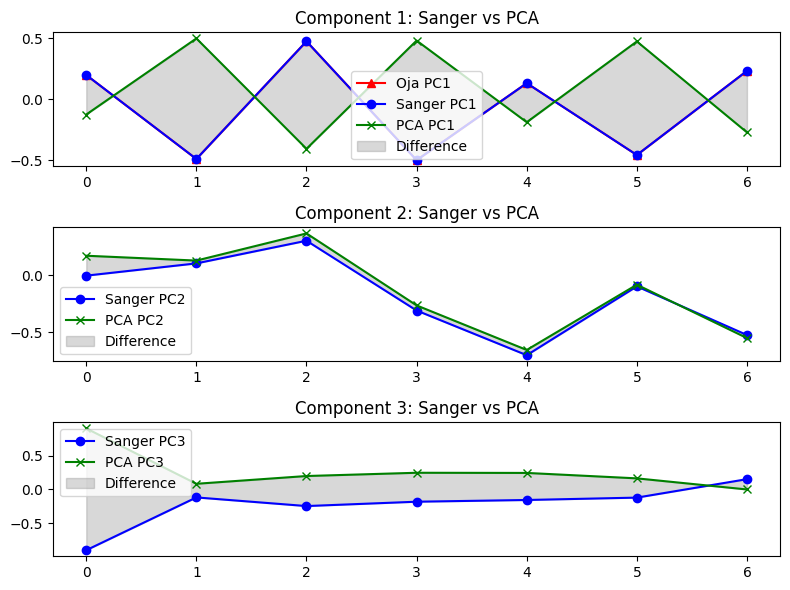

In [2]:
import pandas as pd
from core.oja import Oja
from core.pca import PCA
from core.sanger import Sanger
import numpy as np
import matplotlib.pyplot as plt

full_data = pd.read_csv("../data/europe.csv")
data = full_data.drop(columns=["Country"])
data = (data - data.mean()) / data.std()


num_components = 3  
pca_model = PCA(n_components=num_components, normalize=False)
sanger_model = Sanger(seed=42, num_features=data.shape[1], num_components=num_components)

pca_model.fit(data)
sanger_weights = sanger_model.fit(data, epochs=1000)

pca_components = pca_model.components[:, :num_components].T 


print("Oja's learned components:")
print(oja_weights)

print("Sanger's learned components:")
print(sanger_weights)

print("\nPCA components (transposed):")
print(pca_components)



difference = sanger_weights + pca_components

print("\nDifference between Sanger and PCA components:")
print(difference)

norm_difference = np.linalg.norm(difference, axis=1)
print("\nNorm of the difference between Sanger and PCA components:")
print(norm_difference)


def plot_component_comparison(oja_weights, sanger_weights, pca_components, num_components):
    fig, axes = plt.subplots(num_components, 1, figsize=(8, 6))
    for i in range(num_components):
        if i == 0:
            axes[i].plot(oja_weights, label=f"Oja PC{i+1}", marker='^', color='red') 

        axes[i].plot(sanger_weights[i], label=f"Sanger PC{i+1}", marker='o', color='blue')
        
        axes[i].plot(pca_components[i], label=f"PCA PC{i+1}", marker='x', color='green')
        
        axes[i].fill_between(np.arange(len(sanger_weights[i])), sanger_weights[i], pca_components[i], 
                             color='gray', alpha=0.3, label='Difference')
        
        axes[i].set_title(f'Component {i+1}: Sanger vs PCA')
        axes[i].legend()

    plt.tight_layout()
    plt.show()

# Call the function to display the comparison
plot_component_comparison(oja_weights, sanger_weights, pca_components, num_components)